# Análise de Dados de Pacientes de Doenças Cardíacas

- Fonte: *Heart Disease Data Set* - Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)
- Objetivo: Explorar as conexões entre doenças cardíacas e outras condições e características dos pacientes.

> Este notebook depende do *dataset* mantido pelo usuário *ronit* na plataforma kaggle. Baixe o dataset no site indicado acima (requer *login*) e o desempacote na mesma pasta que este notebook.

## Importando as bibliotecas e acessando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Segundo informações fornecidas pelo mantenedor do dataset, as colunas referem-se a:

- age: idade em anos;
- sex: sexo. 
    - 0: feminino
    - 1: masculino
- cp: tipo de dor no peito.
    - 0: angina típica
    - 1: angina atípica
    - 2: dor não anginosa
    - 3: assintomático
- trestbps: pressão sanguínea em repouso. Em mmHg.
- chol: colesterol sérico em mg/dl.
- fbs: nível de açucar no sangue.
    - 0: menor que 120 mg/dl
    - 1: maior que 120 mg/dl
- restecg: resultados eletrocardiográficos em repouso.
    - 0: normal
    - 1: tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)
    - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios Estes.
- thalach: frequência cardíaca máxima alcançada.
- exang: presença de angina induzida por exercício.
    - 0: não
    - 1: sim
- oldpeak: depressão de ST induzida por exercício em relação ao repouso.
- slope: inclinação do segmento ST no pico do esforço.
    - 0: subida
    - 1: plano
    - 2: descida
- ca: número de vasos principais (0-3) coloridos por fluorosopia.
- thal: resultado do teste de estresse.
    - 3: normal
    - 6: defeito fixo
    - 7: defeito reversível
- target: presença/ausência de condição cardíaca.
    - 0: ausência
    - 1: presença

## Análise Univariada

In [2]:
data.shape

(303, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observações iniciais:
- O *dataset* não apresenta dados faltantes.
- Segundo o dicionário apresentado (e observação dos dados), variáveis categóricas estão representadas de forma numérica.
- O *dataset* se encontra ligeiramente desbalanceado (o número de pacientes com condições cardíacas é um pouco maior que o de pacientes que não apresentam estas condições).
- A faixa de idade dos pacientes é entre 29 e 77 anos, sendo que a maioria (75%) possui idade superior a 47 anos.
- A maioria dos pacientes são do sexo masculino.
- A maioria dos pacientes (cerca de 75%) não apresenta pressão alta em repouso (igual ou acima de 140mmHg, segundo heart.org).
- A maioria dos pacientes (acima de 75%) apresenta colesterol alto (acima de 200mg/dl, segundo medlineplus.gov).
- O nível de açucar no sangue da maioria dos pacientes se encontra abaixo de 120mg/dl.
- A maioria dos pacientes não apresentou angina no teste de estresse.

In [55]:
# Seaborn configurations
fig_dims = (10, 6)

sns.set_theme(
    palette='hot',
    style='whitegrid',
    font_scale=1.5,
    rc={'figure.figsize':fig_dims}
)

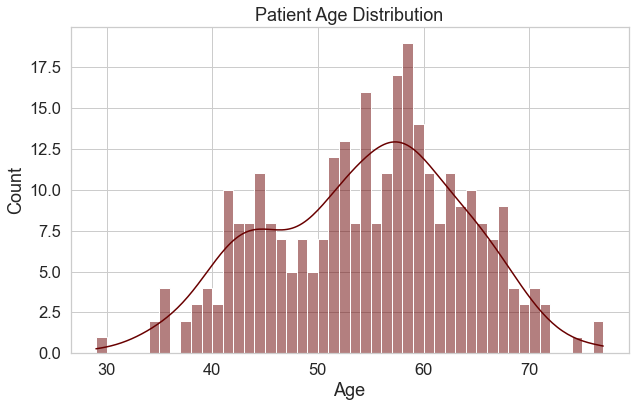

In [64]:
age_plt = sns.histplot(
    data=data,
    x='age',
    kde=True,
    binwidth=1
)

age_plt.set(title='Patient Age Distribution', xlabel='Age')
plt.show()

O gráfico da distribuição das idades dos pacientes, acima, demonstra que a maioria dos pacientes encontra-se, aproximadamente, entre 50 e 65 anos (esta observação é compatível com o observado nos quartis da variável, em que 50% dos pacientes encontram-se entre 47 e 61 anos).

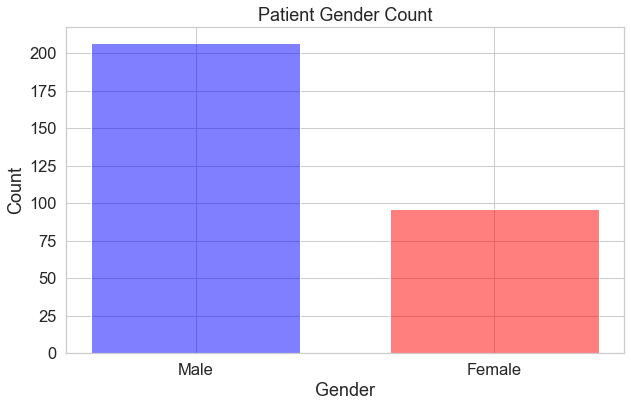

1    207
0     96
Name: sex, dtype: int64


In [92]:
aux = data.copy()
aux.loc[aux['sex'] == 0, 'sex'] = 'Female'
aux.loc[aux['sex'] == 1, 'sex'] = 'Male'

gender_plt = sns.histplot(
    data=aux,
    x='sex',
    hue='sex',
    palette=['b','r'],
    legend=False,
    shrink=.7
)

gender_plt.set(title='Patient Gender Count', xlabel='Gender')
plt.show()

O número de pacientes homens é mais que o dobro do número de pacientes mulheres.

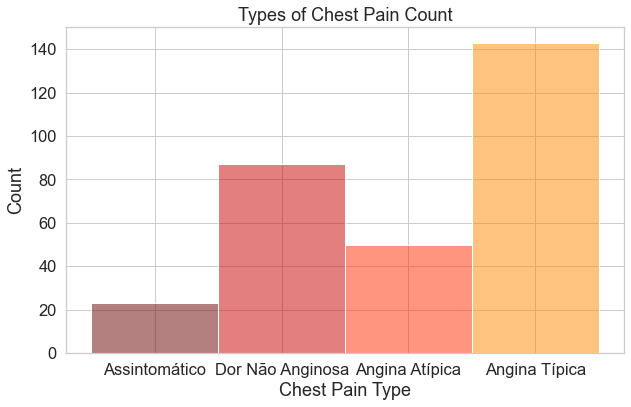

Angina Típica       47.194719
Dor Não Anginosa    28.712871
Angina Atípica      16.501650
Assintomático        7.590759
Name: cp, dtype: float64


In [94]:
aux = data.copy()
aux.loc[aux['cp'] == 0, 'cp'] = 'Angina Típica'
aux.loc[aux['cp'] == 1, 'cp'] = 'Angina Atípica'
aux.loc[aux['cp'] == 2, 'cp'] = 'Dor Não Anginosa'
aux.loc[aux['cp'] == 3, 'cp'] = 'Assintomático'

chest_pain_plt = sns.histplot(
    data=aux,
    x='cp',
    hue='cp',
    legend=False
)

chest_pain_plt.set(title='Types of Chest Pain Count', xlabel='Chest Pain Type')
plt.show()

print((aux['cp'].value_counts()/303)*100)

47% dos pacientes apresentou angina típica, 28.7% apresentou dor não anginosa, 16.5% apresentou angina atípica e 7.6% se apresentou assintomático.

In [10]:
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

A maioria dos pacientes (51.5%) dos pacientes apresentou alguma alteração nos resultados eletrocardiográficos em repouso.

In [11]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

A variável *thal* não se comporta conforme indicado no dicionário fornecido. Sem uma referência que permita interpretar e entender os dados, é recomendado remover a variável do *dataset*.

In [12]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

O *dataset* possui 27 pacientes com doenças cardíacas a mais do que os pacientes que não as apresentam.